In [1]:
!pwd

%matplotlib inline
%reload_ext autoreload
%autoreload 2

import sys
sys.executable

/c/Users/shingo/jupyter_notebook/tf_2_work/predict_face_and_gender/mtcnn


'C:\\Users\\shingo\\Anaconda3\\envs\\tfgpu20\\python.exe'

## 顔検出 facenetのMTCNN（Multi-task CNN）
- https://github.com/ipazc/mtcnn

<br>

- 3つcnnモデルを経由して顔検出してるみたい
- https://kpzhang93.github.io/MTCNN_face_detection_alignment/paper/spl.pdf
    - fast Proposal Network (P-Net)
    - Refinement Network (R-Net)
    - Output Network (O-Net)


In [2]:
# サンプル実行
from mtcnn import MTCNN
import cv2

img = cv2.cvtColor(cv2.imread("ivan.jpg"), cv2.COLOR_BGR2RGB)
detector = MTCNN()
detections = detector.detect_faces(img)
detections

[{'box': [278, 92, 48, 62],
  'confidence': 0.9999450445175171,
  'keypoints': {'left_eye': (291, 117),
   'right_eye': (314, 115),
   'nose': (303, 130),
   'mouth_left': (296, 143),
   'mouth_right': (313, 142)}},
 {'box': [307, 173, 36, 54],
  'confidence': 0.868172287940979,
  'keypoints': {'left_eye': (327, 194),
   'right_eye': (339, 191),
   'nose': (341, 199),
   'mouth_left': (334, 215),
   'mouth_right': (342, 213)}}]

(561, 561, 3)


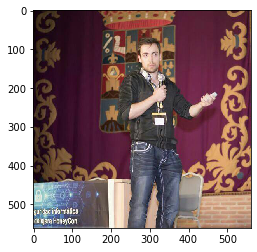

In [3]:
import matplotlib.pyplot as plt
print(img.shape)
plt.imshow(img)
plt.show()

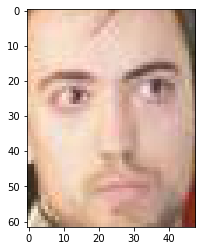

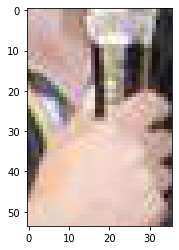

In [4]:
def add_detect_box_img(img, detections):
    """ 検出結果に顔の領域画僧を追加
    """
    for dic_det in detections:
        box = dic_det['box']
        # opencvの画像切り出し img[top : bottom, left : right]
        x1, x2, y1, y2 = box[1], box[1]+box[3], box[0], box[0]+box[2]
        dic_det['box_img'] = img[x1:x2, y1:y2]
    return detections

detections = add_detect_box_img(img, detections)
#print(detections)

for dic_det in detections:
    if dic_det['confidence'] > 0.5:
        plt.imshow(dic_det['box_img'])
        plt.show()
        
_img = dic_det['box_img']